<a href="https://colab.research.google.com/github/wlcosta/es235_pdi/blob/master/11_hough_linhas/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 11 - Transformada de Hough - Detecção de Linhas

Vamos aplicar a Transformada de Hough usando o OpenCV para **detecção de linhas**.

Vamos importar as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

Agora, carregaremos a imagem de testes. Que tal usar uma imagem de exemplo do slide?

In [2]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/sudoku.png

--2023-02-13 11:40:30--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/sudoku.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250720 (245K) [image/png]
Saving to: ‘sudoku.png’

sudoku.png          100%[===================>] 244.84K  --.-KB/s    in 0.02s   

2023-02-13 11:40:31 (12.1 MB/s) - ‘sudoku.png’ saved [250720/250720]



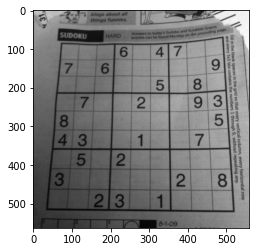

In [3]:
img = cv2.imread('sudoku.png', 0)
plt.imshow(img, cmap="gray")

O primeiro passo é detectar as bordas da imagem. Usaremos o [Canny Edge](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga2a671611e104c093843d7b7fc46d24af) para isso.

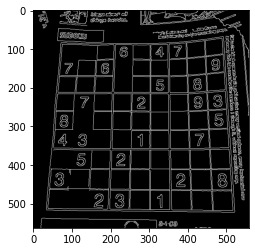

In [4]:
bordas = cv2.Canny(img, 50, 200)
plt.imshow(bordas, cmap="gray")

A transformada nos dará uma lista de linhas que iremos manipular para desenhar as linhas detectadas na imagem. Usaremos a função [cv2.HoughLines()](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a) para aplicar a Transformada de Hough.

In [21]:
linhas = cv2.HoughLines(bordas, 1, np.pi / 180, 150, None, 0, 0)

In [22]:
print(linhas)

[[[ 3.6100000e+02  1.5707964e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 2.1200000e+02  3.4906585e-02]]

 [[ 2.1600000e+02  3.4906585e-02]]

 [[ 2.1600000e+02  1.5707964e+00]]

 [[-3.4900000e+02  3.1241393e+00]]

 [[ 1.6900000e+02  1.5707964e+00]]

 [[ 2.1200000e+02  1.5707964e+00]]

 [[-3.9300000e+02  3.1066861e+00]]

 [[ 4.1200000e+02  1.5707964e+00]]

 [[-4.3600000e+02  3.0892327e+00]]

 [[ 2.6000000e+02  1.7453292e-02]]

 [[ 3.0200000e+02  0.0000000e+00]]

 [[-3.4500000e+02  3.1241393e+00]]

 [[-4.9700000e+02  3.0717795e+00]]

 [[-4.8400000e+02  3.0717795e+00]]

 [[ 7.9000000e+01  8.7266460e-02]]

 [[-3.9100000e+02  3.1066861e+00]]

 [[ 4.1000000e+02  1.5707964e+00]]

 [[-4.3900000e+02  3.0892327e+00]]

 [[-5.0300000e+02  3.0717795e+00]]

 [[-4.9100000e+02  3.0717795e+00]]

 [[-5.0900000e+02  3.0717795e+00]]

 [[ 8.3000000e+01  8.7266460e-02]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 4.6400000e+02  1.5707964e+00]]

 [[ 8.5000000e+01  1.0471976

In [24]:
bordas_copia = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)

for linha in linhas:
    rho,theta = linha[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(bordas_copia,(x1,y1),(x2,y2),(0,255,0),2)

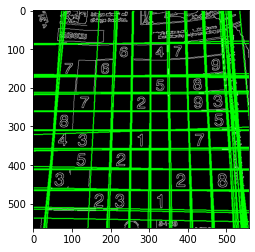

In [25]:
plt.imshow(bordas_copia)

O limiar é um parâmetro que pode ser tunado pra mudar o resultado dado pelo processo. Vamos experimentar mudar esse parâmetro e ver a mudança do resultado:

*Obs*: como isso é bastante custoso, cuidado com o slider!

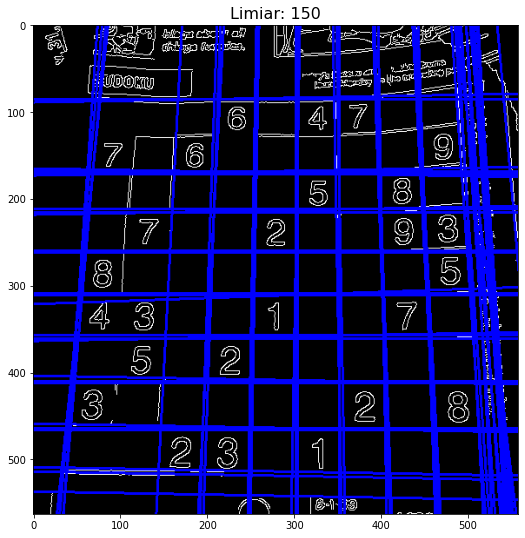

In [14]:
l = 150#@param {type:"slider", min:50, max:200, step:1}
linhas = cv2.HoughLines(bordas, 1, np.pi / 180, l, None, 0, 0)
bordas_copia = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)

for linha in linhas:
    rho,theta = linha[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(bordas_copia,(x1,y1),(x2,y2),(0,0,255),2)

fig, ax = plt.subplots(1, 1, figsize=(12, 9))
fig.subplots_adjust(hspace=0, wspace=0)

ax.set_title("Limiar: %d" % (l), fontsize=16)
ax.imshow(bordas_copia)

Uma outra opção é usar a Transformada de Hough probabilística. O processo é o mesmo, mas o método agora é o [cv2.HoughLinesP](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb). A Transformação de Hough probabilística é uma otimização da Transformada de Hough vista anteriormente. Não leva todos os pontos em consideração. Possui dois novos argumentos:

* minLineLength - O número mínimo de pontos que podem formar uma linha.
* maxLineGap - O intervalo máximo entre dois pontos a serem considerados na mesma linha.

In [15]:
linhas_P = cv2.HoughLinesP(bordas, 1, np.pi / 180, 50, minLineLength=100, maxLineGap=10)

In [19]:
bordas_copia = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)
for linha in linhas_P:
    x1, y1, x2, y2 = linha[0] # Retorna apenas dois pontos
    cv2.line(bordas_copia, (x1, y1), (x2, y2), (0, 255, 0), 3)

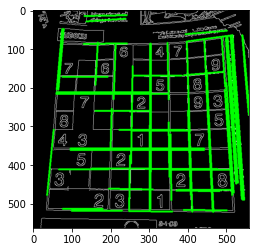

In [20]:
plt.imshow(bordas_copia)

Usando a transformada probabilística, temos mais liberdade para tunar parâmetros. Vamos mudar os parâmetros do limiar, o número mínimo de pontos para formar uma linha e a separação máxima dos pontos para serem considerados a mesma linha:

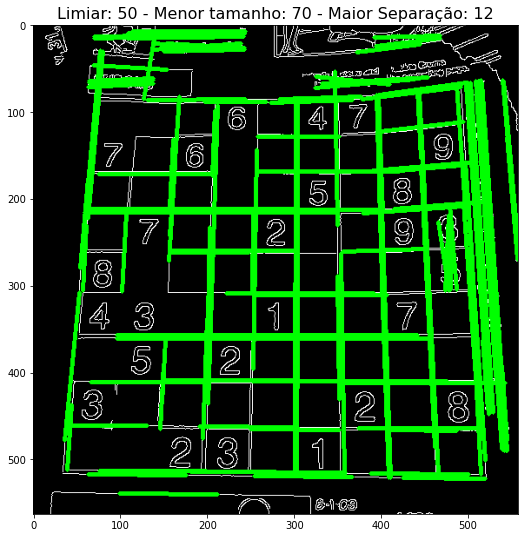

In [30]:
limiar = 50 #@param {type:"slider", min:50, max:200, step:1}
menorTamanhoLinha=70 #@param {type:"slider", min:50, max:100, step:1}
maiorSeparacaoLinha=12 #@param {type:"slider", min:10, max:20, step:1}

linhas_P = cv2.HoughLinesP(bordas, 1, np.pi / 180, limiar, minLineLength=menorTamanhoLinha, maxLineGap=maiorSeparacaoLinha)

bordas_copia = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)
for linha in linhas_P:
    x1, y1, x2, y2 = linha[0] # Retorna apenas dois pontos
    cv2.line(bordas_copia, (x1, y1), (x2, y2), (0, 255, 0), 3)

fig, ax = plt.subplots(1, 1, figsize=(12, 9))
fig.subplots_adjust(hspace=0, wspace=0)
ax.set_title("Limiar: %d - Menor tamanho: %d - Maior Separação: %d" % (limiar, menorTamanhoLinha, maiorSeparacaoLinha), fontsize=16)
ax.imshow(bordas_copia)

Que tal fazer você mesmo? Carregue a imagem a seguir e aplique a transformada de Hough (Pode ser a probabilística ou a normal). Lembre-se de usar os parâmetros corretamente.

In [ ]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/desktop5.png

--2021-06-23 18:50:50--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/desktop5.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30485 (30K) [image/png]
Saving to: ‘desktop5.png’

desktop5.png        100%[===================>]  29.77K  --.-KB/s    in 0.002s  

2021-06-23 18:50:50 (12.2 MB/s) - ‘desktop5.png’ saved [30485/30485]



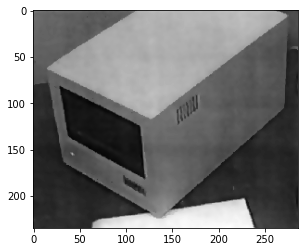

In [ ]:
desktop = cv2.imread('desktop5.png', 0)
plt.imshow(desktop, 'gray')